In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [2]:
X = pd.read_csv('clean_data')

In [3]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,40,1,2,534,3,5,3,3,...,5,5,5,5,5,4,5,3,3,1
1,0,0,49,0,0,383,4,4,4,1,...,2,2,3,2,4,4,5,2,0,0
2,1,0,19,0,0,550,2,3,2,4,...,1,1,4,4,4,1,3,1,35,0
3,0,0,15,0,0,1127,3,5,3,3,...,2,2,4,4,4,5,4,2,14,0
4,1,0,51,0,0,226,2,3,0,3,...,2,2,2,0,3,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,16,0,0,967,2,4,2,4,...,4,4,3,4,4,4,5,4,0,0
5996,1,0,68,0,0,913,1,5,1,3,...,5,1,1,1,1,3,1,2,13,0
5997,1,0,50,0,0,1999,1,5,1,2,...,5,5,5,1,5,4,5,5,26,0
5998,0,0,30,1,2,946,4,4,4,4,...,4,4,4,5,5,4,5,4,0,1


In [4]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [5]:
G = nx.from_numpy_matrix(A)

In [6]:
nx.is_connected(G)

True

In [7]:
#nx.draw(G,node_size=20)

In [8]:
features = pd.Series(X.satisfaction) 

In [9]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [10]:
pos = nx.spring_layout(G)

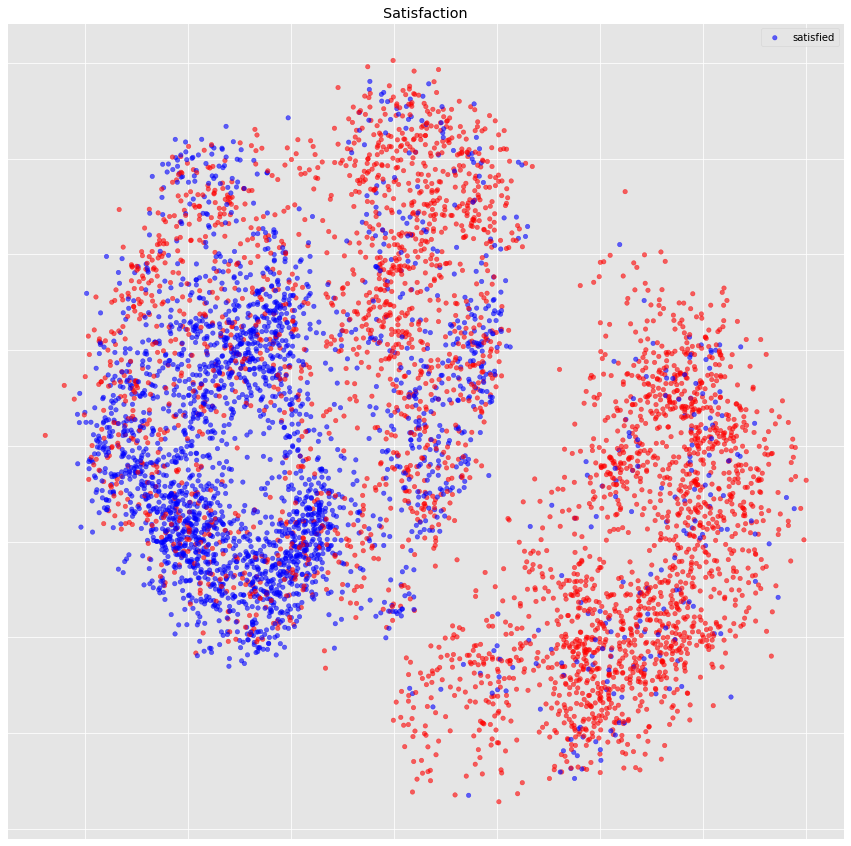

In [11]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend(['satisfied' ,'dissatisfied or neutral'])
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

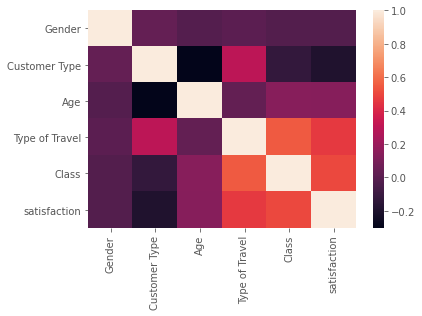

In [12]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [13]:
colmapvar = pd.Series(X['Gender']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


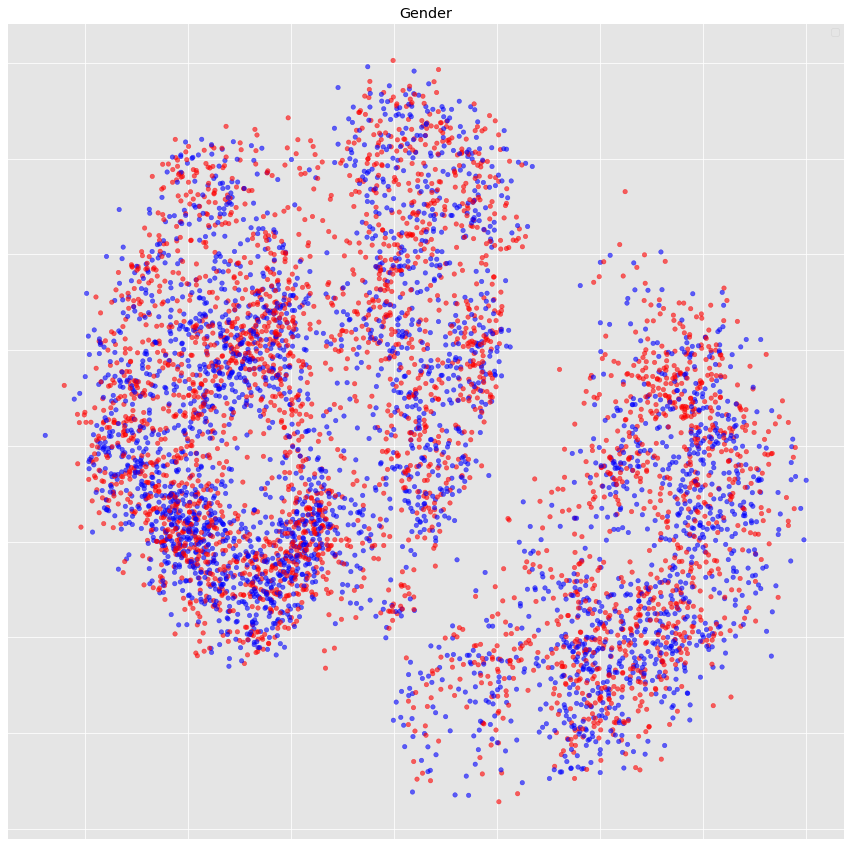

In [14]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Gender')
plt.show()

In [15]:
colmapvar = pd.Series(X['Customer Type']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


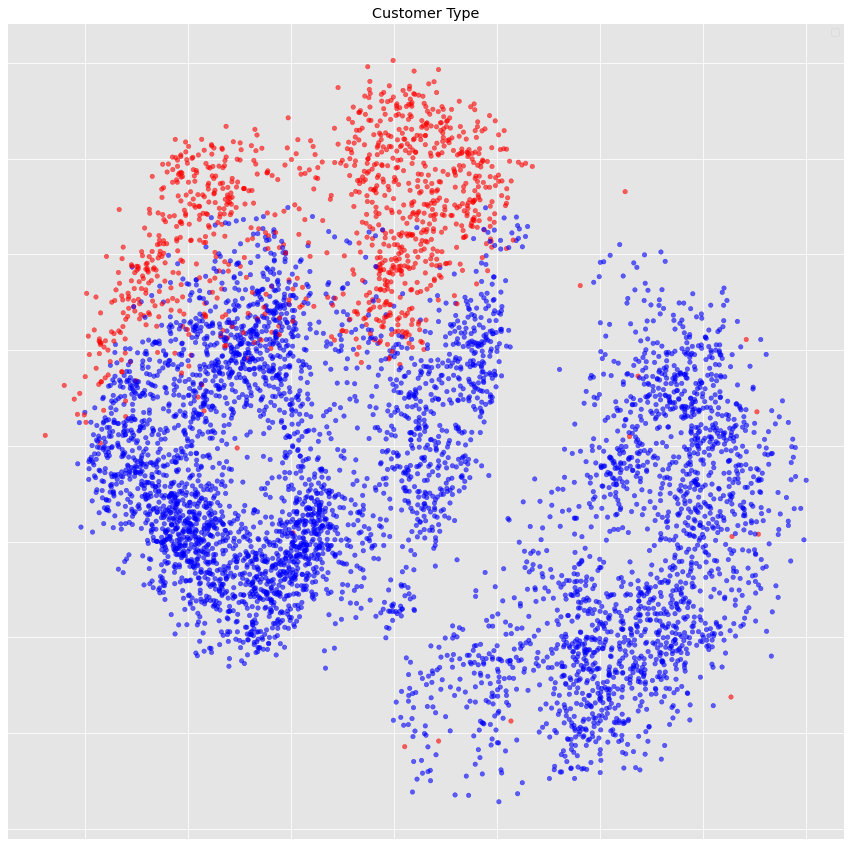

In [16]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Customer Type')
plt.show()

In [17]:
colmapvar = pd.Series(X['Class']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    else:
        color_map.append('green')

No handles with labels found to put in legend.


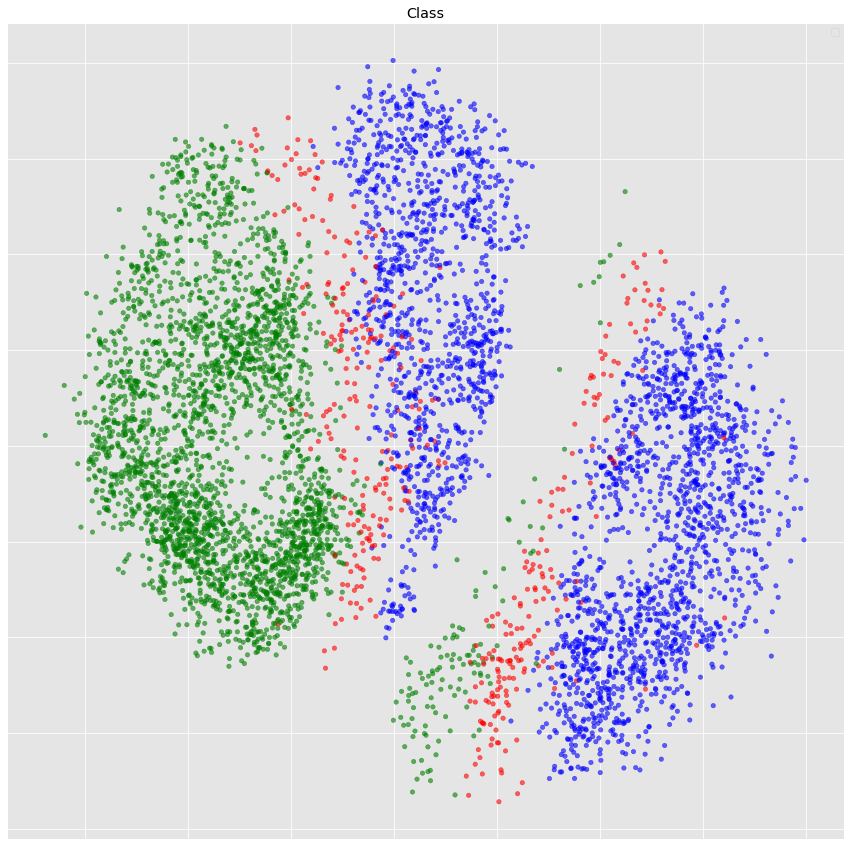

In [18]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Class')
plt.show()

In [19]:
colmapvar = pd.Series(X['Type of Travel']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


No handles with labels found to put in legend.


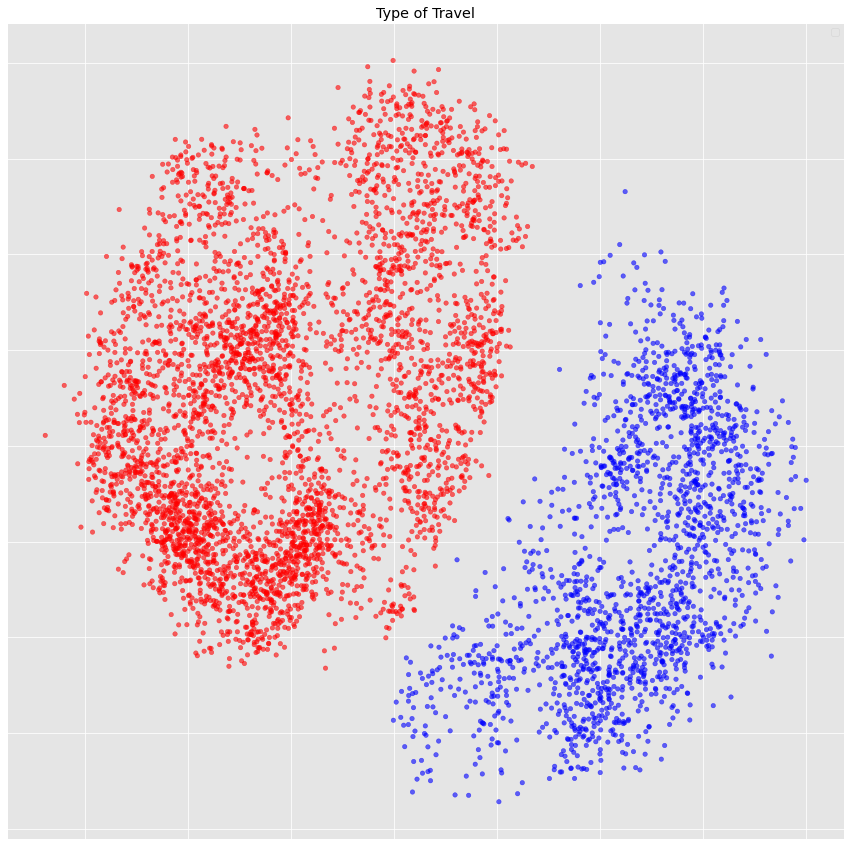

In [20]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Type of Travel')
plt.show()

In [21]:
colmapvar = pd.Series(X['Age']) 
colmapvar = colmapvar.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    elif i[1] == 2:
        color_map.append('green')
    elif i[1] == 3:
        color_map.append('brown')
    else:
        color_map.append('purple')

No handles with labels found to put in legend.


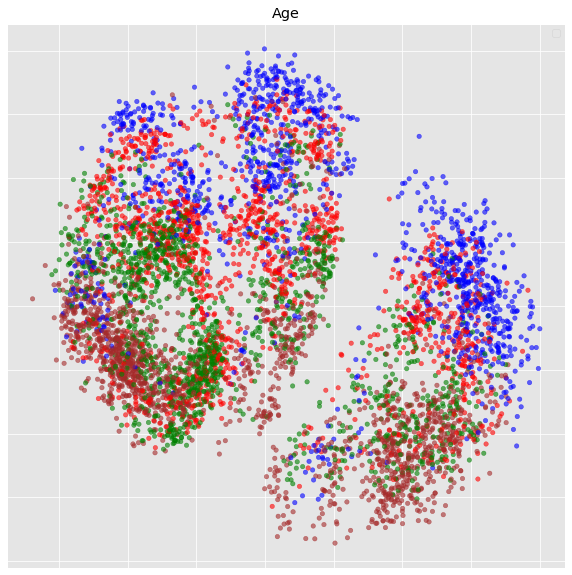

In [22]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Age')
plt.show()

In [23]:
# node2vec
t = pd.read_csv('embeddings_5', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 5)

In [24]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

ValueError: Shape of passed values is (6000, 5), indices imply (6000, 2)

In [25]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.498983
         Iterations 6


In [29]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5994
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.2738
Time:                        15:08:06   Log-Likelihood:                -2993.9
converged:                       True   LL-Null:                       -4122.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.427      0.341      0.733      -0.691       0.982
x1             0.8063      0.063     12.771      0.000       0.683       0.930
x2             0.1549      0.203      0.764      0.4

In [30]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [27]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.7, shuffle=True)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=1)

Epoch 1/60
1800/1800 [==============================] - 7s 3ms/step - loss: 0.5640 - accuracy: 0.7648 - val_loss: 0.4919 - val_accuracy: 0.7714
Epoch 2/60
1800/1800 [==============================] - 7s 4ms/step - loss: 0.4808 - accuracy: 0.7772 - val_loss: 0.4904 - val_accuracy: 0.7755
Epoch 3/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.4945 - accuracy: 0.7765 - val_loss: 0.4935 - val_accuracy: 0.7702
Epoch 4/60
1800/1800 [==============================] - 7s 4ms/step - loss: 0.5059 - accuracy: 0.7694 - val_loss: 0.4922 - val_accuracy: 0.7783
Epoch 5/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.4608 - accuracy: 0.7949 - val_loss: 0.4936 - val_accuracy: 0.7774
Epoch 6/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.4720 - accuracy: 0.7873 - val_loss: 0.4898 - val_accuracy: 0.7776
Epoch 7/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.4648 - accuracy: 0.7863 - val_loss: 0.4903 - val_accuracy:

KeyboardInterrupt: 

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.773
-------------------------------------------------------------
Confusion Matrix validation set:
[[2545  783]
 [ 579 2093]]


In [32]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=X['Class'],alpha=0.8)
plt.show()

NameError: name 'Z' is not defined

<Figure size 1080x1080 with 0 Axes>

In [33]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.3)
G_dgl.ndata['label'] = torch.tensor(features)

Using backend: pytorch


In [34]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [35]:
# Contruct a two-layer GNN model

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, hid_feats_3, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats_1, aggregator_type='mean', feat_drop=0.1)
        
        self.conv2 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=hid_feats_2, aggregator_type='mean', feat_drop=0.1)
        
        self.conv3 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_2, out_feats=out_feats, aggregator_type='mean', feat_drop=0.1)
        
#        self.conv4 = dglnn.pytorch.conv.SAGEConv(
#            in_feats=hid_feats_3, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.normalize(h, p=2, dim=-1)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.normalize(h, p=2, dim=-1)
        h = F.relu(h)
        h = self.conv3(graph, h)
#        h = F.normalize(h, p=2, dim=-1)
#        h = F.relu(h)
#        h = self.conv4(graph,h)
        h = F.normalize(h, p=2, dim=-1)
        h = F.log_softmax(h,dim=1)
        return h

In [36]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [37]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [38]:

model = SAGE(in_feats=n_features, hid_feats_1=120, hid_feats_2 = 100, hid_feats_3=40, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(200):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    
    if epoch % 1 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.8200, validation loss: 0.8218, training accuracy: 0.4372, validation accuracy: 0.4521, Time: 1.7528
Epoch: 1, train loss: 0.7074, validation loss: 0.7094, training accuracy: 0.5398, validation accuracy: 0.5519, Time: 1.6745
Epoch: 2, train loss: 0.6422, validation loss: 0.6512, training accuracy: 0.7102, validation accuracy: 0.7026, Time: 1.9414
Epoch: 3, train loss: 0.6109, validation loss: 0.6146, training accuracy: 0.7550, validation accuracy: 0.7507, Time: 1.9007
Epoch: 4, train loss: 0.5881, validation loss: 0.5869, training accuracy: 0.7780, validation accuracy: 0.7751, Time: 1.8804
Epoch: 5, train loss: 0.5635, validation loss: 0.5645, training accuracy: 0.7976, validation accuracy: 0.7953, Time: 1.8413
Epoch: 6, train loss: 0.5372, validation loss: 0.5443, training accuracy: 0.8195, validation accuracy: 0.8159, Time: 1.8785
Epoch: 7, train loss: 0.5215, validation loss: 0.5170, training accuracy: 0.8307, validation accuracy: 0.8304, Time: 1.8817
Epoch: 8

Epoch: 66, train loss: 0.3750, validation loss: 0.3778, training accuracy: 0.8946, validation accuracy: 0.8916, Time: 1.8909
Epoch: 67, train loss: 0.3740, validation loss: 0.3737, training accuracy: 0.8963, validation accuracy: 0.8923, Time: 1.8906
Epoch: 68, train loss: 0.3647, validation loss: 0.3796, training accuracy: 0.8985, validation accuracy: 0.8923, Time: 1.8987
Epoch: 69, train loss: 0.3724, validation loss: 0.3786, training accuracy: 0.8991, validation accuracy: 0.8911, Time: 1.9065
Epoch: 70, train loss: 0.3717, validation loss: 0.3734, training accuracy: 0.8997, validation accuracy: 0.8914, Time: 1.9213
Epoch: 71, train loss: 0.3745, validation loss: 0.3727, training accuracy: 0.8997, validation accuracy: 0.8930, Time: 1.9226
Epoch: 72, train loss: 0.3635, validation loss: 0.3785, training accuracy: 0.9002, validation accuracy: 0.8937, Time: 1.9253
Epoch: 73, train loss: 0.3724, validation loss: 0.3779, training accuracy: 0.8997, validation accuracy: 0.8940, Time: 1.9238


Epoch: 132, train loss: 0.3528, validation loss: 0.3666, training accuracy: 0.9187, validation accuracy: 0.9042, Time: 1.8789
Epoch: 133, train loss: 0.3453, validation loss: 0.3619, training accuracy: 0.9193, validation accuracy: 0.9044, Time: 1.8792
Epoch: 134, train loss: 0.3436, validation loss: 0.3631, training accuracy: 0.9159, validation accuracy: 0.9056, Time: 1.8854
Epoch: 135, train loss: 0.3415, validation loss: 0.3605, training accuracy: 0.9165, validation accuracy: 0.9056, Time: 1.8832
Epoch: 136, train loss: 0.3523, validation loss: 0.3598, training accuracy: 0.9165, validation accuracy: 0.9054, Time: 1.8859
Epoch: 137, train loss: 0.3396, validation loss: 0.3556, training accuracy: 0.9165, validation accuracy: 0.9054, Time: 1.8844
Epoch: 138, train loss: 0.3444, validation loss: 0.3565, training accuracy: 0.9176, validation accuracy: 0.9065, Time: 1.8875
Epoch: 139, train loss: 0.3517, validation loss: 0.3613, training accuracy: 0.9176, validation accuracy: 0.9063, Time:

Epoch: 198, train loss: 0.3366, validation loss: 0.3503, training accuracy: 0.9322, validation accuracy: 0.9096, Time: 1.9314
Epoch: 199, train loss: 0.3311, validation loss: 0.3505, training accuracy: 0.9327, validation accuracy: 0.9106, Time: 1.9320


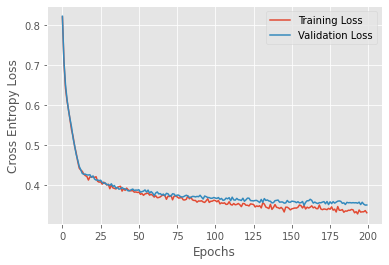

In [39]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

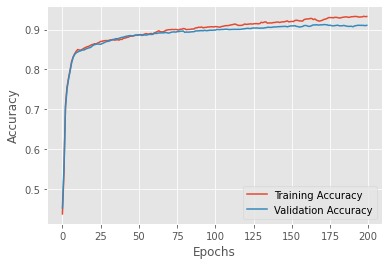

In [40]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=-1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=-1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.767314990512334
-------------------------------------------------------------
Classification Accuracy training set 0.7718609865470852
-------------------------------------------------------------
Confusion Matrix validation set:
[[1790  534]
 [ 447 1445]]
-------------------------------------------------------------
Confusion Matrix training set:
[[761 243]
 [164 616]]


In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(val_lab,indices_val)

0.898316309636007

In [43]:
class GCN(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.GraphConv(
            in_feats=in_feats, out_feats=hid_feats_1)
        
        self.conv2 = dglnn.pytorch.conv.GraphConv(
            in_feats=hid_feats_1, out_feats=out_feats)
        
#        self.conv3 = dglnn.pytorch.conv.GraphConv(
#            in_feats=hid_feats_2, out_feats=out_feats)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
#        h = F.relu(h)
#        h = self.conv3(graph,h)
        h = F.log_softmax(h,dim=1)
        return h

In [44]:
model = GCN(in_feats=n_features, hid_feats_1=100, hid_feats_2=50, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(150):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.7181, validation loss: 0.7183, training accuracy: 0.3156, validation accuracy: 0.3046, Time: 0.4928
Epoch: 10, train loss: 0.6556, validation loss: 0.6544, training accuracy: 0.7522, validation accuracy: 0.7623, Time: 0.3898
Epoch: 20, train loss: 0.6089, validation loss: 0.6067, training accuracy: 0.7534, validation accuracy: 0.7635, Time: 0.3926
Epoch: 30, train loss: 0.5731, validation loss: 0.5705, training accuracy: 0.7573, validation accuracy: 0.7661, Time: 0.3968
Epoch: 40, train loss: 0.5456, validation loss: 0.5433, training accuracy: 0.7635, validation accuracy: 0.7690, Time: 0.4161
Epoch: 50, train loss: 0.5256, validation loss: 0.5240, training accuracy: 0.7724, validation accuracy: 0.7697, Time: 0.4195
Epoch: 60, train loss: 0.5122, validation loss: 0.5113, training accuracy: 0.7696, validation accuracy: 0.7728, Time: 0.4150
Epoch: 70, train loss: 0.5038, validation loss: 0.5037, training accuracy: 0.7719, validation accuracy: 0.7732, Time: 0.4150
E

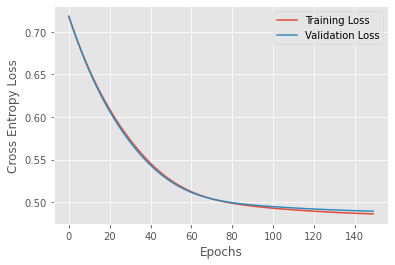

In [45]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

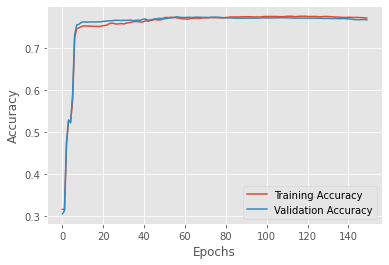

In [46]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:

val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.767314990512334
-------------------------------------------------------------
Classification Accuracy training set 0.7718609865470852
-------------------------------------------------------------
Confusion Matrix validation set:
[[1790  534]
 [ 447 1445]]
-------------------------------------------------------------
Confusion Matrix training set:
[[761 243]
 [164 616]]


In [48]:
roc_auc_score(val_lab,indices_val)

0.7669829120165349

In [49]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.7, shuffle=True)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=5)

Epoch 1/60
360/360 [==============================] - 2s 5ms/step - loss: 0.5541 - accuracy: 0.7551 - val_loss: 0.4047 - val_accuracy: 0.8383
Epoch 2/60
360/360 [==============================] - 2s 4ms/step - loss: 0.3842 - accuracy: 0.8533 - val_loss: 0.3520 - val_accuracy: 0.8562
Epoch 3/60
360/360 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8665 - val_loss: 0.3290 - val_accuracy: 0.8710
Epoch 4/60
360/360 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.8745 - val_loss: 0.3108 - val_accuracy: 0.8807
Epoch 5/60
360/360 [==============================] - 2s 6ms/step - loss: 0.2705 - accuracy: 0.8861 - val_loss: 0.2958 - val_accuracy: 0.8879
Epoch 6/60
360/360 [==============================] - 2s 5ms/step - loss: 0.2705 - accuracy: 0.8909 - val_loss: 0.2849 - val_accuracy: 0.8957
Epoch 7/60
360/360 [==============================] - 2s 5ms/step - loss: 0.2463 - accuracy: 0.9018 - val_loss: 0.2752 - val_accuracy: 0.8969
Epoch 

360/360 [==============================] - 1s 3ms/step - loss: 0.1089 - accuracy: 0.9568 - val_loss: 0.2137 - val_accuracy: 0.9160
Epoch 59/60
360/360 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9571 - val_loss: 0.2117 - val_accuracy: 0.9176
Epoch 60/60
360/360 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.9576 - val_loss: 0.2143 - val_accuracy: 0.9183


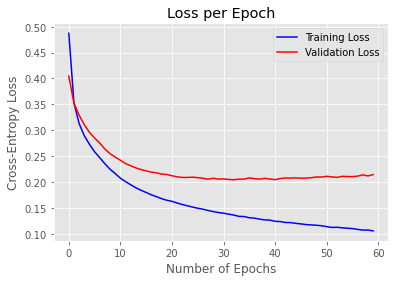

In [51]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

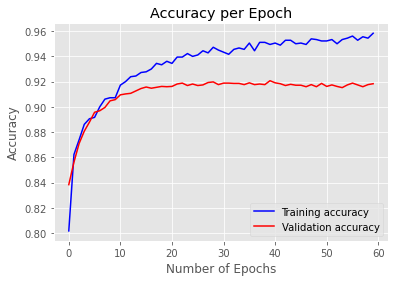

In [52]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [53]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.6, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.95875
0.9238888888888889


In [54]:
yhat_svm = clf.predict(x_test)
yhat_train_svm = clf.predict(x_train)

print('Classification Accuracy validation set {}'.format(accuracy_score(y_test,yhat_svm)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(yhat_train_svm,y_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(y_test,yhat_svm))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(yhat_train_svm,y_train))

Classification Accuracy validation set 0.9238888888888889
-------------------------------------------------------------
Classification Accuracy training set 0.95875
-------------------------------------------------------------
Confusion Matrix validation set:
[[1888  104]
 [ 170 1438]]
-------------------------------------------------------------
Confusion Matrix training set:
[[1306   69]
 [  30  995]]


In [55]:
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(feat,features, test_size = 0.6, shuffle=True)

log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.342772
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           20
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.5022
Time:                        15:19:12   Log-Likelihood:                -822.65
converged:                       True   LL-Null:                       -1652.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0810      0.064     -1.273      0.203      -0.206       0.044
1             -0.7753      0.

In [56]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.score(x_train,y_train))

0.8780555555555556
0.8733333333333333


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8583333333333333
0.8669444444444444
